In [10]:
import numpy as np

In [37]:
class SVM:
  def __init__(self, learning_rate = 0.001, lambda_parameter = 0.01, n_iters=1000):
    self.lr = learning_rate
    self.lambda_parameter = lambda_parameter
    self.n_iters = n_iters
    self.weights = 0
    self.bias = 0

  def fit(self, X_train, y_train):
    #change y values
    y = np.where(y_train<=0, -1, 1)

    #get features from shape
    n_sample, n_features = X_train.shape

    #make weights, bias arrays
    self.weights = np.zeros(n_features)
    self.bias = 0

    # for loop for iteration
    for i in range(self.n_iters):
      for idx, x_i in enumerate(X):
        linear_equation = np.dot(x_i, self.weights) - self.bias
        condition = y[idx] * linear_equation
        if condition >= 1: # y and value of function in same class
          dw = 2 * self.lambda_parameter * self.weights
          self.weights -= self.lr * dw
          self.bias = 0
        else:
          dw = 2 * self.lambda_parameter * self.weights - y[idx] * x_i
          db = y[idx]
          self.weights -= self.lr * dw
          self.bias -= y[idx]

  def predict(self, X_test):
    return np.sign(np.dot(X_test, self.weight) - self.bias)

[0.61620019 0.1613202 ] 0


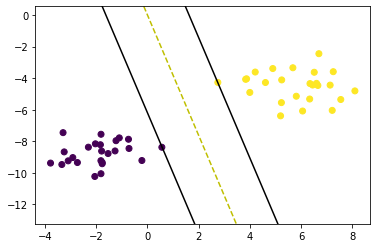

In [39]:
# Imports
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)
# predictions = clf.predict(X)

print(clf.weights, clf.bias)


def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = get_hyperplane_value(x0_1, clf.weights, clf.bias, 0)
x1_2 = get_hyperplane_value(x0_2, clf.weights, clf.bias, 0)

x1_1_m = get_hyperplane_value(x0_1, clf.weights, clf.bias, -1)
x1_2_m = get_hyperplane_value(x0_2, clf.weights, clf.bias, -1)

x1_1_p = get_hyperplane_value(x0_1, clf.weights, clf.bias, 1)
x1_2_p = get_hyperplane_value(x0_2, clf.weights, clf.bias, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.show()

        